## YOLO-WORLD

YOLO-WORLD paper:  https://arxiv.org/pdf/2401.17270v2.pdf

Source code: https://github.com/AILab-CVC/YOLO-World

In [11]:
#!pip install ultralytics

In [1]:
import ultralytics
ultralytics.__version__

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at 'C:\Users\f\AppData\Roaming\Ultralytics\settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.


'8.1.17'

### loading a pre-trained yolo-world model and running a prediction on an image.

In [19]:
from ultralytics import YOLOWorld

# Initialize a YOLO-World model
model = YOLOWorld('yolov8l-world.pt')  # or select yolov8m/l-world.pt for different sizes

# Execute inference with the YOLOv8s-world model on the specified image
results = model.predict('a.jpg', device='cpu', save=True)

# Show results
results[0].show()


image 1/1 D:\YOLO_WORLD_env\yolo_world_ppe\a.jpg: 384x640 2 persons, 2 tvs, 1 book, 242.0ms
Speed: 1.0ms preprocess, 242.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict5


### Set prompts for specific tasks

The YOLO-World framework allows for the dynamic specification of classes through custom prompts, empowering users to tailor the model to their specific needs without retraining. 

In [21]:
# Define custom classes
model.set_classes(["hard hat", "gloves"])

# Execute prediction for specified categories on an image
results = model.predict('a.jpg', device='cpu', save=True)

# Show results
results[0].show()


image 1/1 D:\YOLO_WORLD_env\yolo_world_ppe\a.jpg: 384x640 2 hard hats, 3 glovess, 229.0ms
Speed: 1.0ms preprocess, 229.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict5


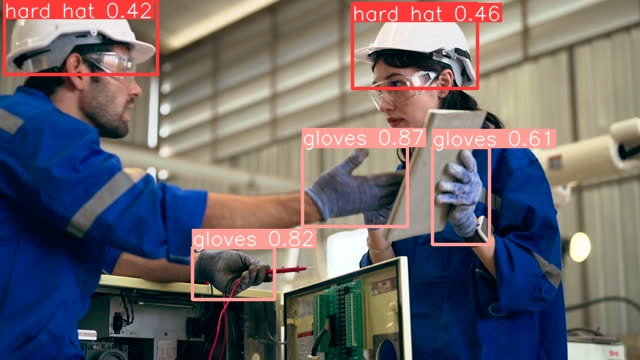

In [11]:
from IPython.display import Image

Image(filename=f"runs/detect/predict/a.jpg", width=600)

#### You can also save a model after setting custom classes. By doing this you create a version of the YOLO-World model that is specialized for your specific use case. 

In [22]:
from ultralytics import YOLO

# Initialize a YOLO-World model
model = YOLO('yolov8l-world.pt')  

model.set_classes(["hard hat", "gloves"])

# Save the model with the defined offline vocabulary
model.save("custom_yolov8l.pt")

##### After saving, the custom_yolov8s.pt model behaves like any other pre-trained YOLOv8 model but with a key difference: it is now optimized to detect only the classes you have defined. 

## Load custom model and perform predictions

In [23]:
from ultralytics import YOLO

# Load your custom model
model = YOLO('custom_yolov8l.pt')


# Run inference to detect your custom classes
results = model.predict('test_images', device='cpu', save=True)

# Show results
results[0].show()


image 1/3 D:\YOLO_WORLD_env\yolo_world_ppe\test_images\c.jpg: 384x640 2 hard hats, 3 glovess, 236.0ms
image 2/3 D:\YOLO_WORLD_env\yolo_world_ppe\test_images\d.jpg: 384x640 2 hard hats, 4 glovess, 236.0ms
image 3/3 D:\YOLO_WORLD_env\yolo_world_ppe\test_images\e.jpg: 384x640 1 hard hat, 228.0ms
Speed: 0.7ms preprocess, 233.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict6


In [24]:
from ultralytics import YOLO

# Load your custom model
model = YOLO('custom_yolov8l.pt')


# Run inference to detect your custom classes
results = model.predict('ppe.mp4', device='cpu', save=True)

# Show results
results[0].show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/408) D:\YOLO_WORLD_env\yolo_world_ppe\ppe.mp4: 384x640 1 hard hat, 4 glovess, 233.0ms
video 1/1 (2/408) D:\YOLO_WORLD_env\yolo_world_ppe\ppe.mp4: 384x640 1 hard hat, 4 glovess, 230.0ms
video 1/1 (3/408) D:\YOLO_WORLD_env\yolo_world_ppe\ppe.mp4: 384x640 1 hard hat, 4 glovess, 229.2ms
video 1/1 (4/408) D:\YOLO_WORLD_env\yolo_world_ppe\ppe.mp4: 384x640 2 hard hats, 5 glovess, 229.0ms
video 1/1 (5/408) D:\YOLO_WORLD_env\yolo_world_ppe\ppe.mp4: